## Customer Churn Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings

<module 'warnings' from 'C:\\Users\\nakul\\anaconda3\\lib\\warnings.py'>

In [2]:
df = pd.read_csv("bank.csv", sep=";")
#ensure that the file is saved in the working directory

## Data Exploration & Visualization

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.shape

(4521, 17)

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

 # no missing values found

In [8]:
df.duplicated().sum()

0

# no duplicated values found

# Visualization

<AxesSubplot:xlabel='y', ylabel='count'>

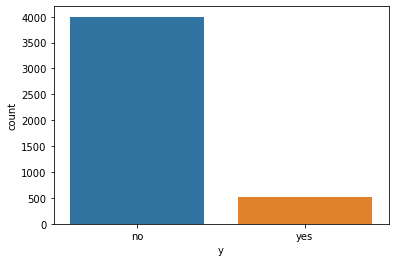

In [9]:
# Plot the distribution of target variable
# y - has the client subscribed a term deposit? (binary: "yes","no")
sns.countplot(x='y', data=df)

In [10]:
y_im = 100*df['y'].value_counts()/len(df['y'])
y_im

no     88.476001
yes    11.523999
Name: y, dtype: float64

# data is highly imbalanced

# Plotting categorical variables

C:\Users\nakul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nakul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nakul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nakul\anaconda3\lib\si

<AxesSubplot:xlabel='poutcome', ylabel='count'>

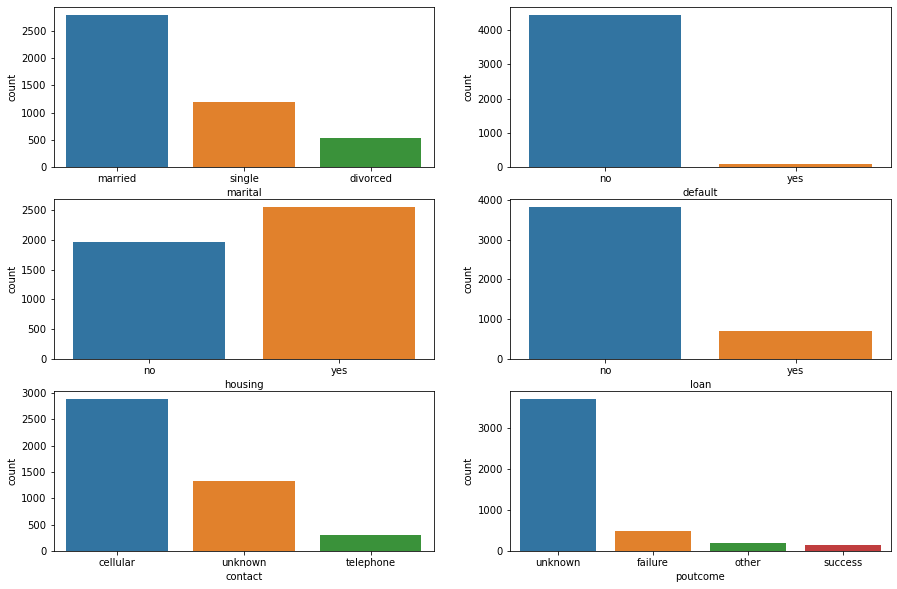

In [11]:
fig, axes = plt.subplots(3,2,figsize=(15,10))
sns.countplot(df['marital'],ax=axes[0,0])
sns.countplot(df['default'],ax=axes[0,1])
sns.countplot(df['housing'],ax=axes[1,0])
sns.countplot(df['loan'],ax=axes[1,1])
sns.countplot(df['contact'],ax=axes[2,0])
sns.countplot(df['poutcome'],ax=axes[2,1])

# Plotting ordinal variables

C:\Users\nakul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nakul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nakul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

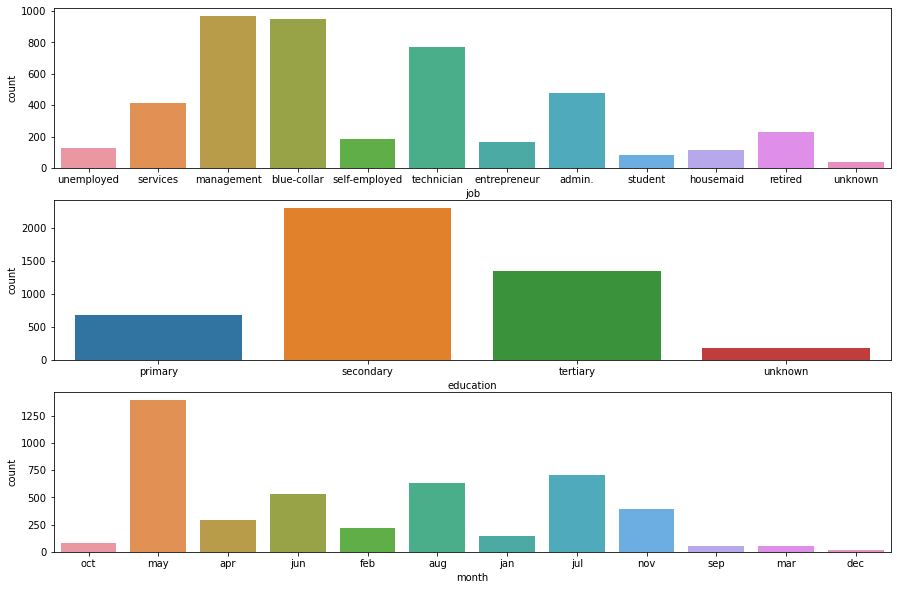

In [12]:
fig, axes = plt.subplots(3,1,figsize=(15,10))
sns.countplot(df['job'],ax=axes[0])
sns.countplot(df['education'],ax=axes[1])
sns.countplot(df['month'],ax=axes[2])

# Plotting numerical variables

C:\Users\nakul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nakul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nakul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='age', ylabel='Density'>

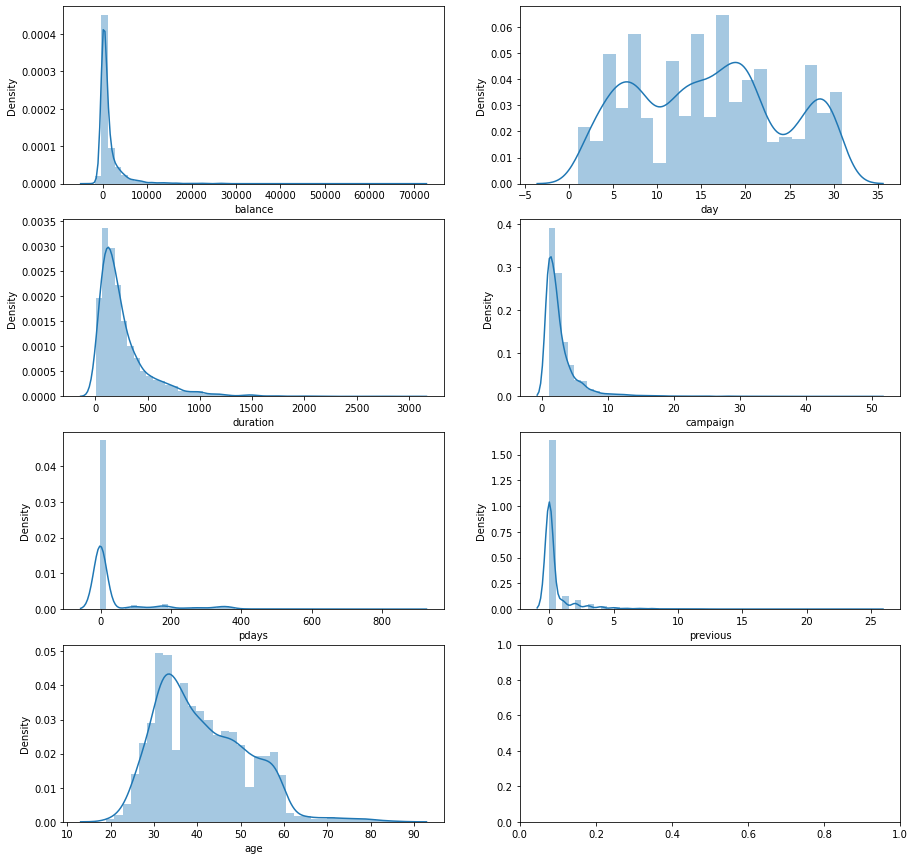

In [13]:
fig, axes = plt.subplots(4,2,figsize=(15,15))
sns.distplot(df['balance'],ax=axes[0,0])
sns.distplot(df['day'],ax=axes[0,1])
sns.distplot(df['duration'],ax=axes[1,0])
sns.distplot(df['campaign'],ax=axes[1,1])
sns.distplot(df['pdays'],ax=axes[2,0])
sns.distplot(df['previous'],ax=axes[2,1])
sns.distplot(df['age'],ax=axes[3,0])

## Data Cleaning

In [14]:
#creating a copy of data to avoid any type of information loss

In [15]:
bank_df = df.copy()
bank_df.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [16]:
'''The 'day' and 'month' columns can be omitted since the 'pdays' column provides the 
    number of days that have elapsed since the client's last contact from a prior campaign.'''
bank_df.drop(['day','month'], axis = 1, inplace = True)

In [17]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no


In [18]:
#Replacing all the unknown values by nan
for i in bank_df.columns:
    bank_df[i] = np.where(bank_df[i] == "unknown", np.nan, bank_df[i])
bank_df.isna().sum()

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

In [19]:
#we do not need poutcome and contact so dropping it
bank_df.drop("poutcome", inplace = True, axis = 1)
bank_df.drop("contact", inplace = True, axis = 1)

In [20]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,30.0,unemployed,married,primary,no,1787.0,no,no,79.0,1.0,-1.0,0.0,no
1,33.0,services,married,secondary,no,4789.0,yes,yes,220.0,1.0,339.0,4.0,no
2,35.0,management,single,tertiary,no,1350.0,yes,no,185.0,1.0,330.0,1.0,no
3,30.0,management,married,tertiary,no,1476.0,yes,yes,199.0,4.0,-1.0,0.0,no
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,226.0,1.0,-1.0,0.0,no


In [21]:
bank_df.isna().sum()

age            0
job           38
marital        0
education    187
default        0
balance        0
housing        0
loan           0
duration       0
campaign       0
pdays          0
previous       0
y              0
dtype: int64

In [22]:
#filling null values
bank_df["job"].fillna(method = "ffill",inplace=True)
bank_df["education"].fillna(method = "ffill",inplace= True)
bank_df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

## Data Preprosessing

In [23]:
bank_df['y']= bank_df['y'].replace(['yes','no'],[1, 0]) 
bank_df['default']= bank_df['default'].replace(['yes','no'],[1, 0]) 
bank_df['housing']= bank_df['housing'].replace(['yes','no'],[1, 0]) 
bank_df['loan']= bank_df['loan'].replace(['yes','no'],[1, 0]) 

In [24]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,30.0,unemployed,married,primary,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0
1,33.0,services,married,secondary,0,4789.0,1,1,220.0,1.0,339.0,4.0,0
2,35.0,management,single,tertiary,0,1350.0,1,0,185.0,1.0,330.0,1.0,0
3,30.0,management,married,tertiary,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0
4,59.0,blue-collar,married,secondary,0,0.0,1,0,226.0,1.0,-1.0,0.0,0


In [25]:
'''One Hot Encoder:- Most Machine Learning algorithms cannot work with categorical data and needs
to be converted into numerical data.
One-hot encoding is the process by which categorical data are converted into numerical data for use in machine learning.
Categorical features are turned into binary features that are “one-hot” encoded, meaning that 
if a feature is represented by that column, it receives a 1. Otherwise, it receives a 0 '''


'One Hot Encoder:- Most Machine Learning algorithms cannot work with categorical data and needs\nto be converted into numerical data.\nOne-hot encoding is the process by which categorical data are converted into numerical data for use in machine learning.\nCategorical features are turned into binary features that are “one-hot” encoded, meaning that \nif a feature is represented by that column, it receives a 1. Otherwise, it receives a 0 '

In [26]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
bank_df[list(bank_df["job"].unique())] = one.fit_transform(bank_df[["job"]]).A
bank_df.drop("job",axis = 1, inplace = True)
bank_df

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,...,services,management,blue-collar,self-employed,technician,entrepreneur,admin.,student,housemaid,retired
0,30.0,married,primary,0,1787.0,0,0,79.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,33.0,married,secondary,0,4789.0,1,1,220.0,1.0,339.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,35.0,single,tertiary,0,1350.0,1,0,185.0,1.0,330.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30.0,married,tertiary,0,1476.0,1,1,199.0,4.0,-1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,59.0,married,secondary,0,0.0,1,0,226.0,1.0,-1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,married,secondary,0,-333.0,1,0,329.0,5.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4517,57.0,married,tertiary,1,-3313.0,1,1,153.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4518,57.0,married,secondary,0,295.0,0,0,151.0,11.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4519,28.0,married,secondary,0,1137.0,0,0,129.0,4.0,211.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
education_dum = pd.get_dummies(bank_df['education'],drop_first=True)
marital_dum = pd.get_dummies(bank_df['marital'],drop_first=True)
print(education_dum)
print(marital_dum)

      secondary  tertiary
0             0         0
1             1         0
2             0         1
3             0         1
4             1         0
...         ...       ...
4516          1         0
4517          0         1
4518          1         0
4519          1         0
4520          0         1

[4521 rows x 2 columns]
      married  single
0           1       0
1           1       0
2           0       1
3           1       0
4           1       0
...       ...     ...
4516        1       0
4517        1       0
4518        1       0
4519        1       0
4520        0       1

[4521 rows x 2 columns]


In [28]:
bank_df=pd.concat([bank_df,education_dum,marital_dum],axis=1)
bank_df.drop("marital",axis = 1, inplace = True)
bank_df.drop("education",axis = 1, inplace = True)
bank_df

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,technician,entrepreneur,admin.,student,housemaid,retired,secondary,tertiary,married,single
0,30.0,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
1,33.0,0,4789.0,1,1,220.0,1.0,339.0,4.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
2,35.0,0,1350.0,1,0,185.0,1.0,330.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
3,30.0,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
4,59.0,0,0.0,1,0,226.0,1.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,0,-333.0,1,0,329.0,5.0,-1.0,0.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
4517,57.0,1,-3313.0,1,1,153.0,1.0,-1.0,0.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,0
4518,57.0,0,295.0,0,0,151.0,11.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0,1,0
4519,28.0,0,1137.0,0,0,129.0,4.0,211.0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0


## Model Building

In [29]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

In [30]:
x=bank_df.drop('y',axis=1)
y=bank_df['y']

In [31]:
x.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,unemployed,...,technician,entrepreneur,admin.,student,housemaid,retired,secondary,tertiary,married,single
0,30.0,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
1,33.0,0,4789.0,1,1,220.0,1.0,339.0,4.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
2,35.0,0,1350.0,1,0,185.0,1.0,330.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
3,30.0,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
4,59.0,0,0.0,1,0,226.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0


In [32]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [33]:
#Splitting the data for training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [34]:
xg_mod = XGBClassifier(n_estimators=100, random_state = 100)
xg_mod.fit(x_train,y_train)
y_pred = xg_mod.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
#checking the accuracy of model using r2 score
r2_score = xg_mod.score(x_test, y_test)
print(r2_score)

0.9027624309392265


## Finding the best parameters

In [36]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

In [47]:
params = {
    "n_estimators": randint(50, 500),
    "max_depth": randint(2, 10),
    "learning_rate": uniform(0.01, 0.3),
    "colsample_bytree": uniform(0.3, 0.7),
    "subsample": uniform(0.3, 0.7),
    "gamma": uniform(0, 0.5),
    "reg_lambda": uniform(0, 2),
}

In [48]:
rand_search = RandomizedSearchCV(xg_mod, params, cv=5, random_state=42, n_jobs=-1)

In [49]:
rand_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_froz

In [50]:
y_pred_1 = rand_search.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy = accuracy_score(y_test, y_pred_1)
print("Best hyperparameters: ", rand_search.best_params_)
print("Accuracy: ", accuracy)

Best hyperparameters:  {'colsample_bytree': 0.8827098485602951, 'gamma': 0.10616955533913808, 'learning_rate': 0.06454749016213018, 'max_depth': 6, 'n_estimators': 210, 'reg_lambda': 0.6084844859190754, 'subsample': 0.6673295021425665}
Accuracy:  0.8939226519337017


## Final Model

In [52]:
xg_mod_fin = XGBClassifier(colsample_bytree = 0.602361513049481, gamma = 0.14561457009902096, 
                           learning_rate = 0.19355586841671385, max_depth = 3, n_estimators = 237, 
                           reg_lambda = 0.7327236865873834, subsample = 0.619248988951925)
xg_mod_fin.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.602361513049481, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.14561457009902096, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.19355586841671385, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=237, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [53]:
y_pred_fin = xg_mod_fin.predict(x_test)
y_pred_fin

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Performance metrics & AUC-ROC Score

In [45]:
from sklearn.metrics import roc_auc_score,roc_curve

In [54]:
acur_sc = xg_mod_fin.score(x_test, y_test)

y_pred_prob = xg_mod_fin.predict_proba(x_test)[:,1]#for auc-roc score
auc_roc = roc_auc_score(y_test, y_pred_prob)

print("Accuracy: ",acur_sc)
print(" ")
print("Classificaion Report:")
print(metrics.classification_report(y_test, y_pred_fin))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred_fin))
print(" ")
print("AUC-ROC Score: ", auc_roc)

Accuracy:  0.9005524861878453
 
Classificaion Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       796
           1       0.67      0.34      0.45       109

    accuracy                           0.90       905
   macro avg       0.79      0.66      0.70       905
weighted avg       0.89      0.90      0.89       905

Confusion Matrix:
[[778  18]
 [ 72  37]]
 
AUC-ROC Score:  0.8995666405421604
